In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the JSON file into a pandas DataFrame
df = pd.read_json('../../dataset/News_Category_Dataset_v3.json', lines=True)

# Display the first few rows to inspect the data
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
# Count the number of articles in each category
category_counts = df['category'].value_counts()

# Get the top 10 categories
top_categories = category_counts.head(10).index.tolist()

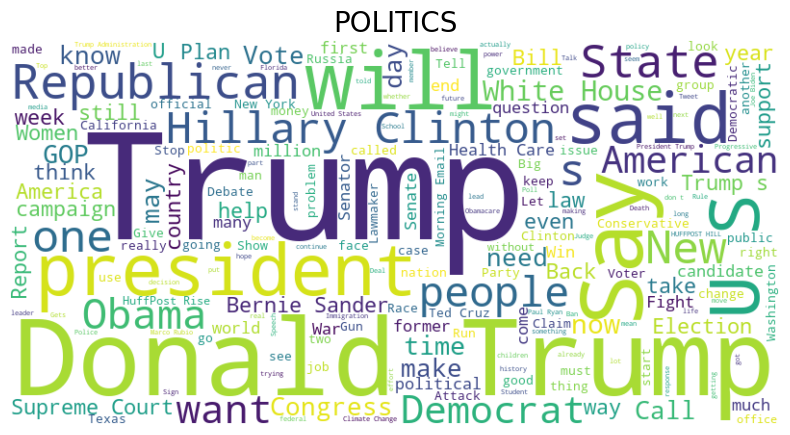

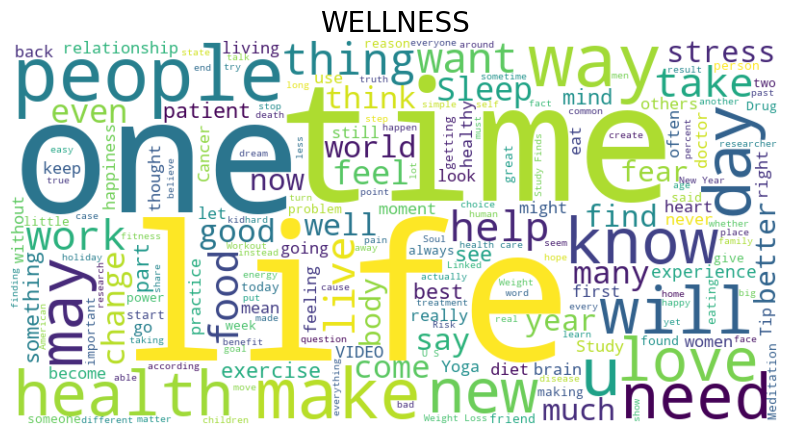

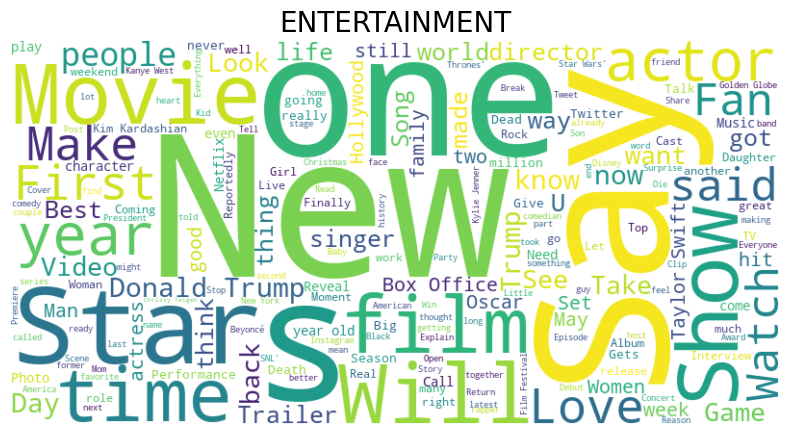

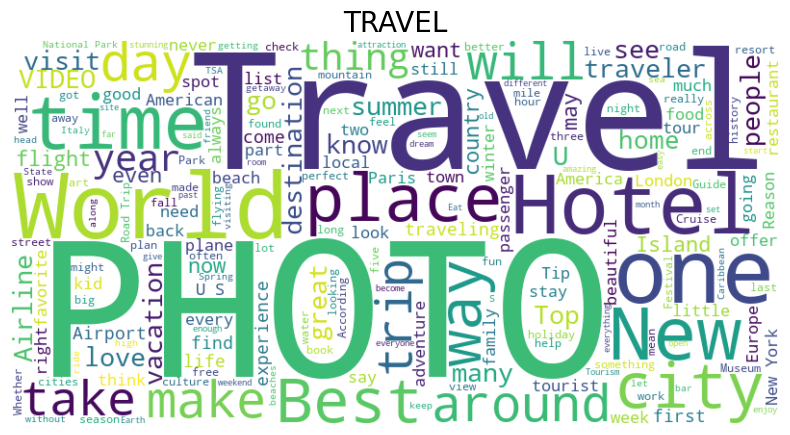

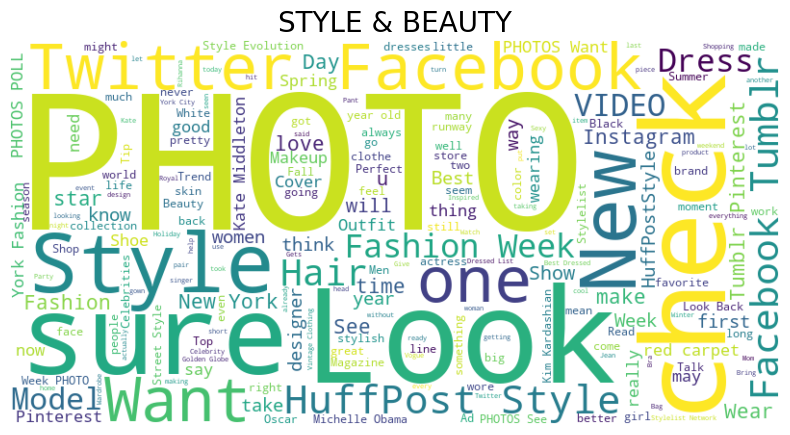

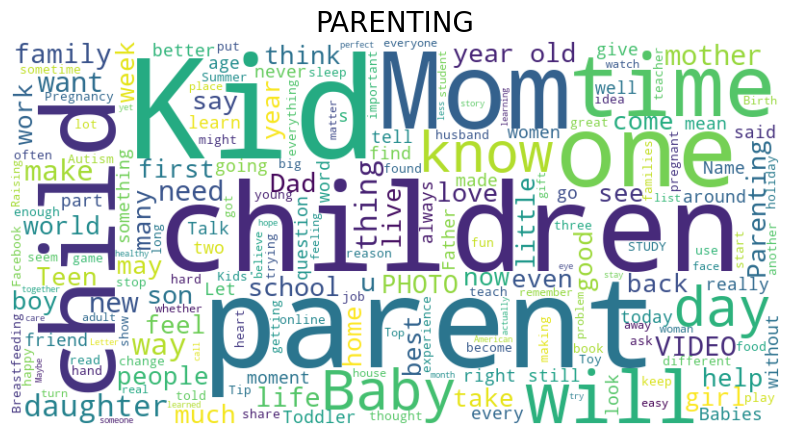

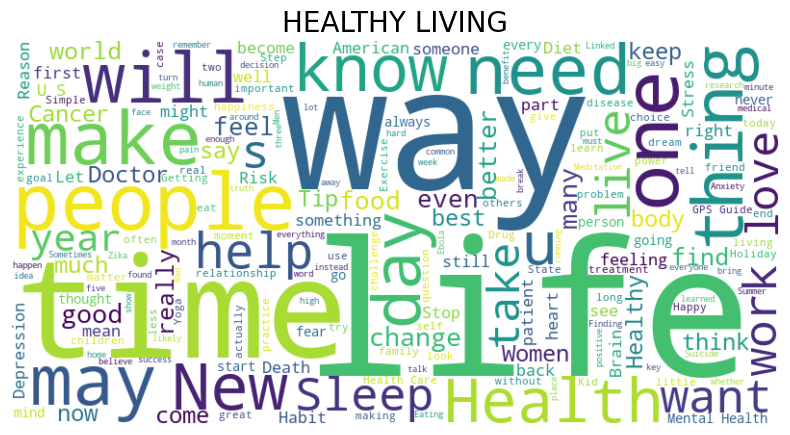

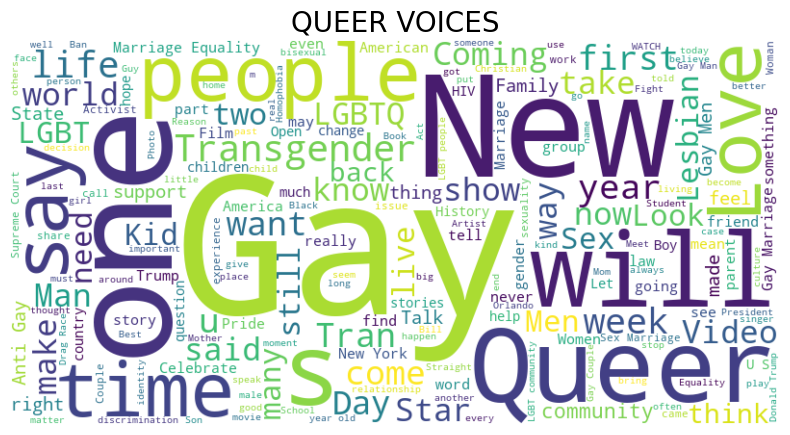

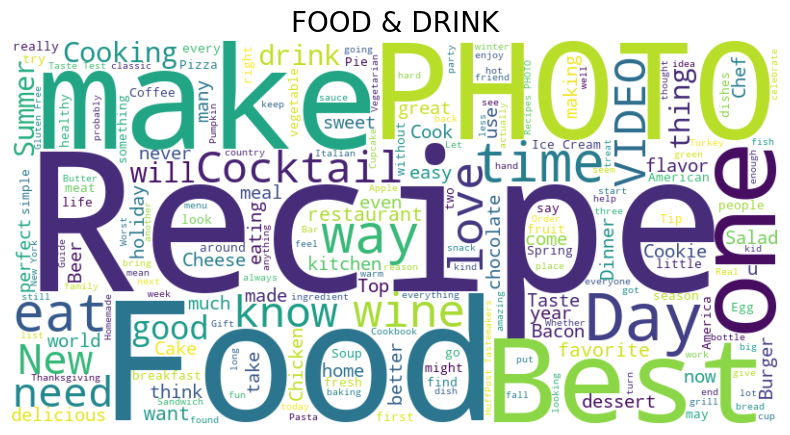

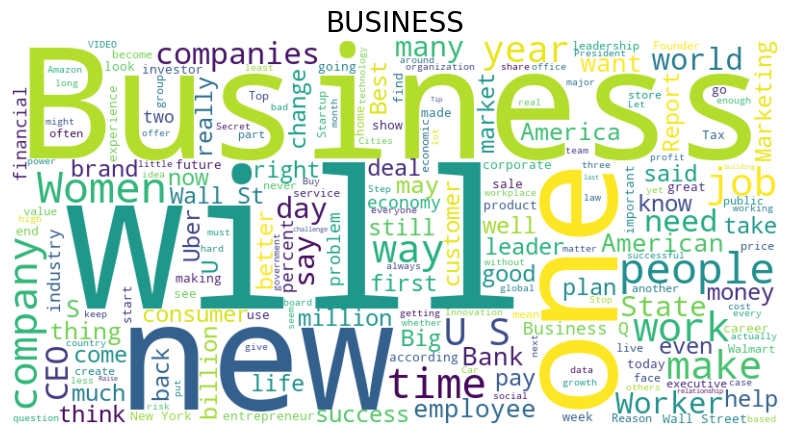

In [3]:

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Create a dictionary to store concatenated text for each category
category_texts = {}

for category in top_categories:
    # Filter articles belonging to the category
    category_df = df[df['category'] == category]
    
    # Concatenate the 'headline' and 'short_description' columns
    combined_text = ' '.join(category_df['headline'].astype(str) + ' ' + category_df['short_description'].astype(str))
    
    # Store the combined text in the dictionary
    category_texts[category] = combined_text
    
    # Generate and display the word cloud
    generate_word_cloud(combined_text, category)


In [4]:
from collections import Counter
import re

# Function to clean and tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Step 1: Filter Data for Top 10 Categories
top_categories = category_counts.head(10).index.tolist()
df_top = df[df['category'].isin(top_categories)]

# Dictionary to store concatenated text for each top category
category_texts = {}

for category in top_categories:
    category_df = df_top[df_top['category'] == category]
    combined_text = ' '.join(category_df['headline'].astype(str) + ' ' + category_df['short_description'].astype(str))
    category_texts[category] = combined_text



In [5]:
# Step 2: Recompute Word Counts
word_counts = {}

for category, text in category_texts.items():
    tokens = tokenize(text)
    word_count = Counter(tokens)
    word_counts[category] = word_count

In [6]:
# Step 3: Predict Category for Each Word
word_category_prediction = {}

all_words = set()
for count in word_counts.values():
    all_words.update(count.keys())

for word in all_words:
    max_count = 0
    best_category = None
    for category, count in word_counts.items():
        word_count = count.get(word, 0)
        if word_count > max_count:
            max_count = word_count
            best_category = category
    word_category_prediction[word] = best_category

In [7]:
# Step 4: Calculate Accuracy
correct_predictions = 0
total_words = 0

for category, count in word_counts.items():
    for word in count.keys():
        true_category = category
        predicted_category = word_category_prediction[word]
        total_words += 1
        if predicted_category == true_category:
            correct_predictions += 1

accuracy = correct_predictions / total_words

print(f"Accuracy of word-category prediction for top 10 categories: {accuracy:.2f}")

Accuracy of word-category prediction for top 10 categories: 0.34


In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Filter the DataFrame to include only articles from the top 10 categories
top_categories = df['category'].value_counts().head(10).index.tolist()
df_top = df[df['category'].isin(top_categories)]

# Combine headline and short description into a single text column
df_top['text'] = df_top['headline'].astype(str) + ' ' + df_top['short_description'].astype(str)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_top['text'], df_top['category'], test_size=0.2, random_state=42)

# Create a pipeline that vectorizes the text data using CountVectorizer then fits a Naive Bayes model
model = make_pipeline(CountVectorizer(stop_words='english'), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

C:\Users\71526\AppData\Local\Temp\ipykernel_5572\4206732933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['text'] = df_top['headline'].astype(str) + ' ' + df_top['short_description'].astype(str)


Model accuracy: 0.78
